In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from datetime import datetime

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from wordcloud import WordCloud
from wordcloud import wordcloud, STOPWORDS

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk 
import nltk.sentiment.vader as vader


# Loading in products data

In [2]:
product_info = pd.read_csv(r"C:\Nistha\Ctag Python\Sephora\Sephora_Dataset\product_info.csv", low_memory=False)
product_info.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [3]:
required = pd.read_csv(r"C:\Nistha\Ctag Python\Sephora\Sephora_Dataset\reviews_1.csv", low_memory=False)
product_info2 = pd.read_csv(r"C:\Nistha\Ctag Python\Sephora\Sephora_Dataset\reviews_2.csv", low_memory=False)
product_info3 = pd.read_csv(r"C:\Nistha\Ctag Python\Sephora\Sephora_Dataset\reviews_3.csv", low_memory=False)
product_info4 = pd.read_csv(r"C:\Nistha\Ctag Python\Sephora\Sephora_Dataset\reviews_4.csv", low_memory=False)
product_info5 = pd.read_csv(r"C:\Nistha\Ctag Python\Sephora\Sephora_Dataset\reviews_5.csv", low_memory=False)

# Combining the product_infos
reviews = pd.concat([required,product_info2,product_info3,product_info4,product_info5])
def eda(product_info,head=5):
    print("------------Shape------------")
    print(product_info.shape)
    print("------------Size------------")
    print(product_info.size)
    print("------------Head------------")
    print(product_info.head().to_string())
    print("------------Tail------------")
    print(product_info.tail().to_string())
    print("------------Null Values------------")
    print(product_info.isna().sum())
    print("------------Information------------")
    print(product_info.info())
    print("------------Describe------------")
    print(product_info.describe().to_string())
eda(reviews)


------------Shape------------
(1094411, 19)
------------Size------------
20793809
------------Head------------
   Unnamed: 0    author_id  rating  is_recommended  helpfulness  total_feedback_count  total_neg_feedback_count  total_pos_feedback_count submission_time                                                                                                                                                                                                                                                                                                                                                                                                                                                              review_text                      review_title skin_tone eye_color    skin_type hair_color product_id                                        product_name brand_name  price_usd
0           0   1741593524       5             1.0          1.0                     2                         0    

# Missing Values


In [4]:
for i in product_info.columns:
    if product_info[i].dtype == 'int64' or product_info[i].dtype == 'float64':
        product_info[i].fillna(0, inplace=True) 

    else:
        product_info[i].fillna("", inplace=True) 

C:\Users\nisth\AppData\Local\Temp\ipykernel_480\1196912063.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_info[i].fillna("", inplace=True)
C:\Users\nisth\AppData\Local\Temp\ipykernel_480\1196912063.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [5]:
for i in reviews.columns:
    if reviews[i].dtype == 'int64' or reviews[i].dtype == 'float64':
        reviews[i].fillna(0, inplace=True) 

    else:
        reviews[i].fillna("", inplace=True) 

C:\Users\nisth\AppData\Local\Temp\ipykernel_480\1299376024.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews[i].fillna(0, inplace=True)
C:\Users\nisth\AppData\Local\Temp\ipykernel_480\1299376024.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

# Visualisation

In [6]:
product_info['rating']=round(product_info['rating'])
t1=pd.crosstab(product_info['brand_name'],product_info['rating'])
t1

rating,0.0,1.0,2.0,3.0,4.0,5.0
brand_name,,,,,,
19-69,0,0,0,4,10,0
54 Thrones,0,0,0,0,3,1
ABBOTT,0,0,0,0,6,7
AERIN,2,0,1,3,16,2
ALTERNA Haircare,1,0,0,1,32,11
...,...,...,...,...,...,...
philosophy,1,0,0,0,0,0
rms beauty,0,0,0,1,6,4
shu uemura,0,0,0,1,24,18


In [7]:
color=['#fd5c63','#D2122E','#E32636','#E52B50','#A52A2A','#FF0800','#DE3163']

                    reviews
brand_name                 
Kérastase               108
Bumble and bumble       110
NEST New York           115
tarte                   131
Dior                    136
CLINIQUE                179
SEPHORA COLLECTION      352


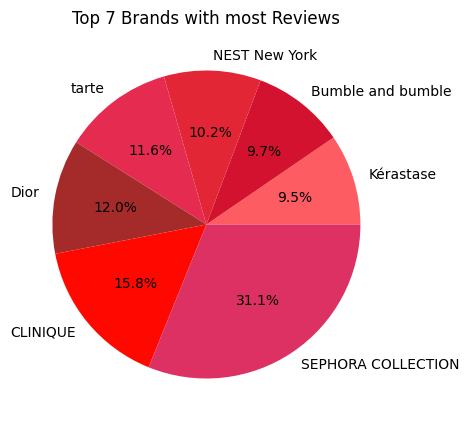

In [8]:
top_10_brands=product_info.groupby('brand_name')[['reviews']].count()
top_10_brands= top_10_brands.sort_values(by='reviews').tail(7)
print(top_10_brands)
brand_names = top_10_brands.index.to_list()
review_counts = top_10_brands.values.flatten()
sns.set_palette(color)
plt.figure(figsize=(5,5))
plt.pie(review_counts, labels=brand_names, autopct="%1.1f%%")  # Add percentages
plt.title("Top 7 Brands with most Reviews")
plt.show()

                    primary_category
brand_name                          
Kérastase                        108
Bumble and bumble                110
NEST New York                    115
tarte                            131
Dior                             136
CLINIQUE                         179
SEPHORA COLLECTION               352


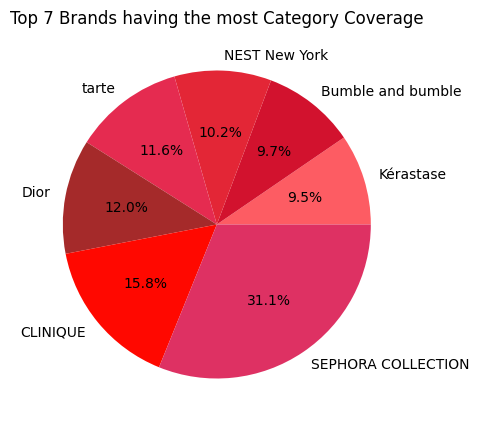

In [9]:
 
top_10_brands=product_info.groupby('brand_name')[['primary_category']].count()
top_10_brands= top_10_brands.sort_values(by='primary_category').tail(7)
print(top_10_brands)
sns.set_palette(color)

brand_names = top_10_brands.index.to_list()
review_counts = top_10_brands.values.flatten()
plt.figure(figsize=(5,5))
# Create pie chart
plt.pie(review_counts, labels=brand_names, autopct="%1.1f%%")  # Add percentages
plt.title("Top 7 Brands having the most Category Coverage")
plt.show()

                  brand_name
primary_category            
Men                       60
Mini Size                288
Bath & Body              405
Fragrance               1432
Hair                    1464
Makeup                  2369
Skincare                2420


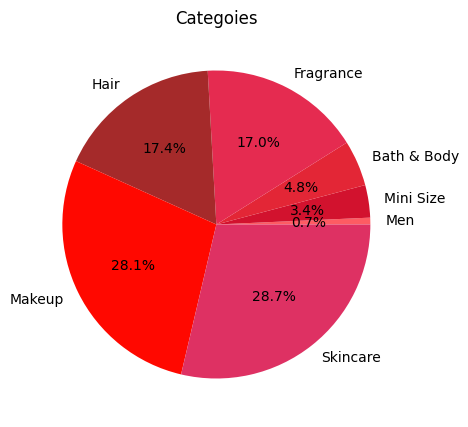

In [10]:
top_10_brands=product_info.groupby('primary_category')[['brand_name']].count()
top_10_brands= top_10_brands.sort_values(by='brand_name').tail(7)
print(top_10_brands)
brand_names = top_10_brands.index.to_list()
review_counts = top_10_brands.values.flatten()
plt.figure(figsize=(5,5))
sns.set_palette(color)

# Create pie chart
plt.pie(review_counts, labels=brand_names, autopct="%1.1f%%")  # Add percentages
plt.title("Categoies")
plt.show()

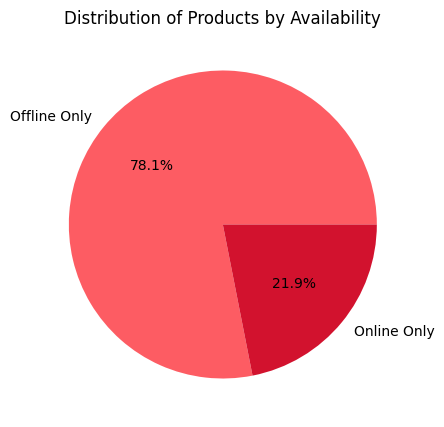

In [11]:
# Count the occurrences of online_only attribute
online_only_counts = product_info['online_only'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(5,5))
sns.set_palette(color)

plt.pie(online_only_counts, labels=['Offline Only', 'Online Only'], autopct="%1.1f%%")
plt.title("Distribution of Products by Availability")
plt.show()


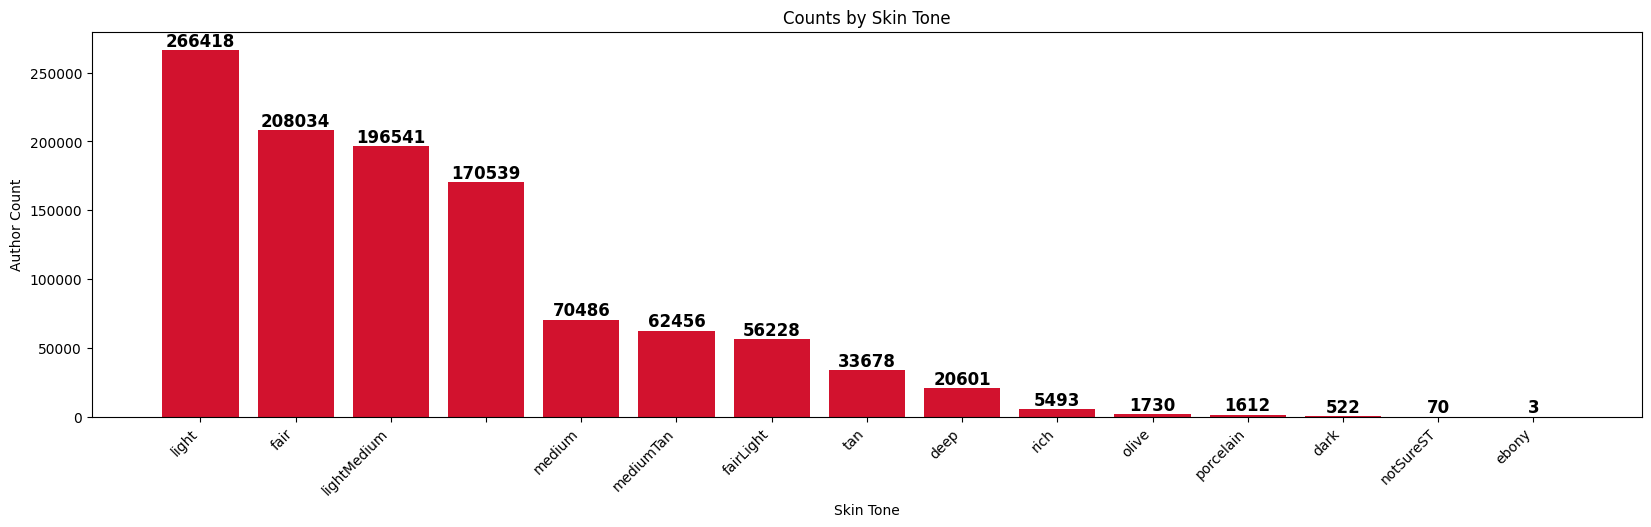

In [12]:
plt.figure(figsize=(20, 5))  # Set figure size for readability

d = reviews.groupby('skin_tone')['author_id'].count().sort_values(ascending=False)  # Group, count, and sort

# Create the bar chart with error bars (optional)
plt.bar(d.index, d)  # Add error bars as 10% of count (adjust as needed)
# Annotate bar values with alignment
bars = plt.bar(d.index, d)  # Get bar objects for annotation
for bar, label in zip(bars, d):
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{label:.0f}",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')  # Adjust text formatting

plt.xlabel('Skin Tone')
plt.ylabel('Author Count')
plt.title('Counts by Skin Tone')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()


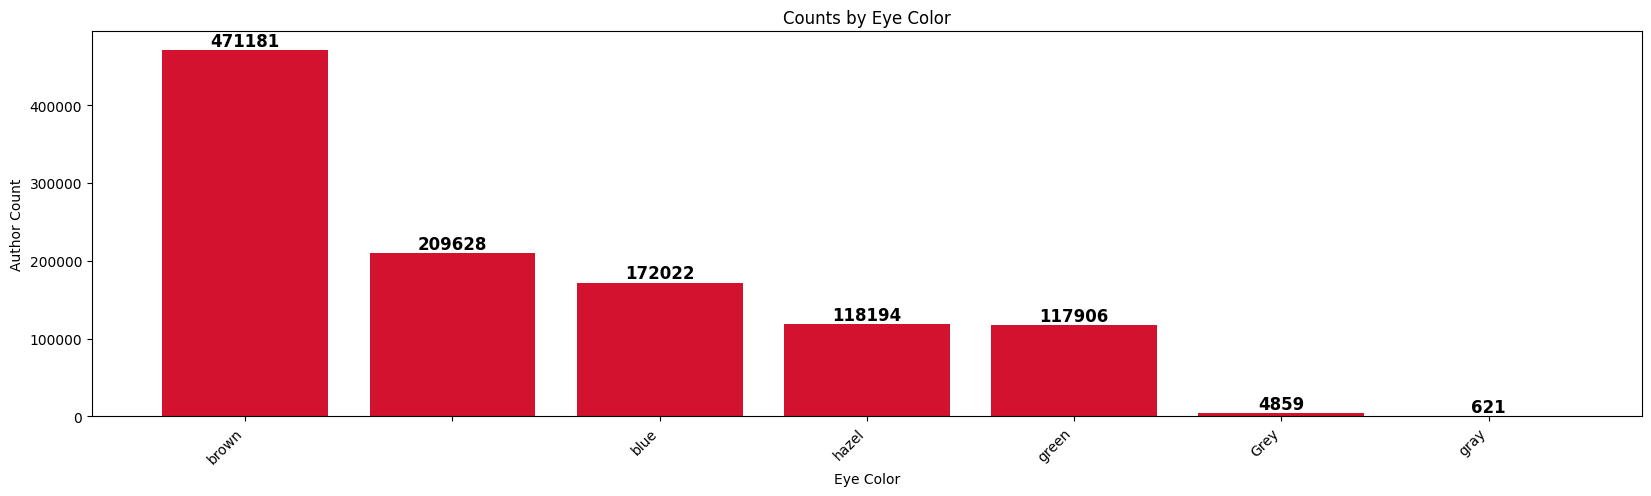

In [13]:
plt.figure(figsize=(20, 5))  # Set figure size for readability

d = reviews.groupby('eye_color')['author_id'].count().sort_values(ascending=False)  # Group, count, and sort

# Create the bar chart with error bars (optional)
plt.bar(d.index, d)  # Add error bars as 10% of count (adjust as needed)
# Annotate bar values with alignment
bars = plt.bar(d.index, d)  # Get bar objects for annotation
for bar, label in zip(bars, d):
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{label:.0f}",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')  # Adjust text formatting

plt.xlabel('Eye Color')
plt.ylabel('Author Count')
plt.title('Counts by Eye Color')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()


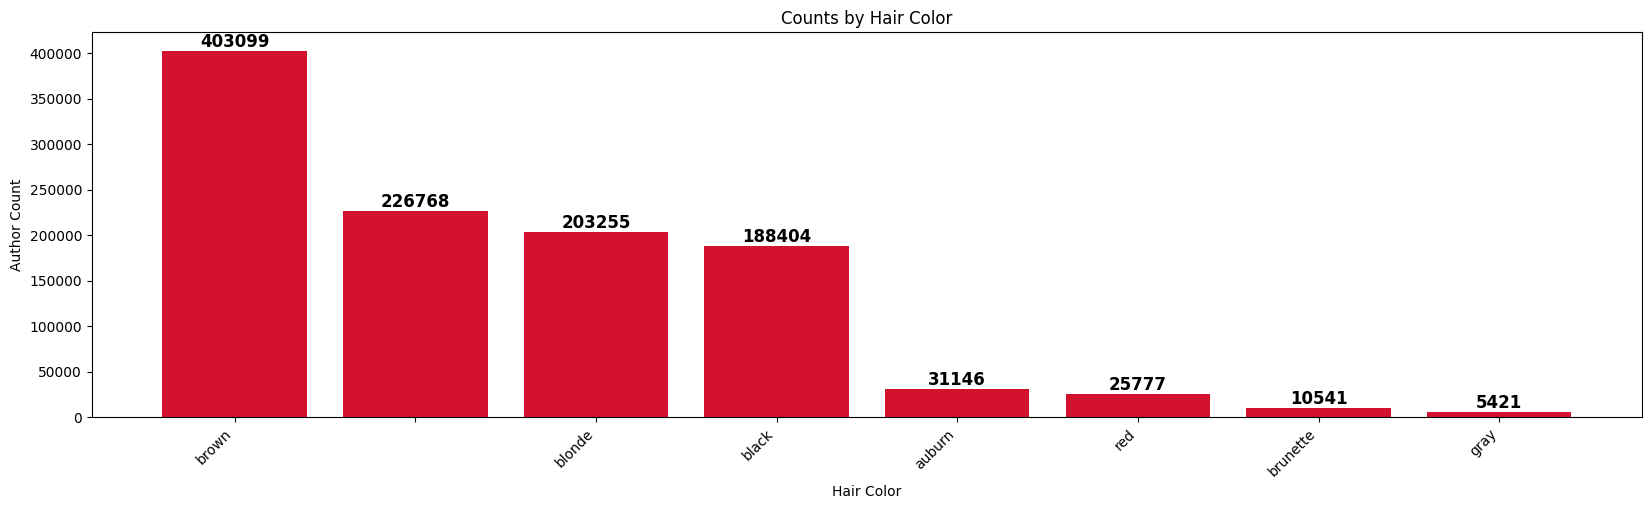

In [14]:
plt.figure(figsize=(20, 5))  # Set figure size for readability

d = reviews.groupby('hair_color')['author_id'].count().sort_values(ascending=False)  # Group, count, and sort

# Create the bar chart with error bars (optional)
plt.bar(d.index, d)  # Add error bars as 10% of count (adjust as needed)
# Annotate bar values with alignment
bars = plt.bar(d.index, d)  # Get bar objects for annotation
for bar, label in zip(bars, d):
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{label:.0f}",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')  # Adjust text formatting

plt.xlabel('Hair Color')
plt.ylabel('Author Count')
plt.title('Counts by Hair Color')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()


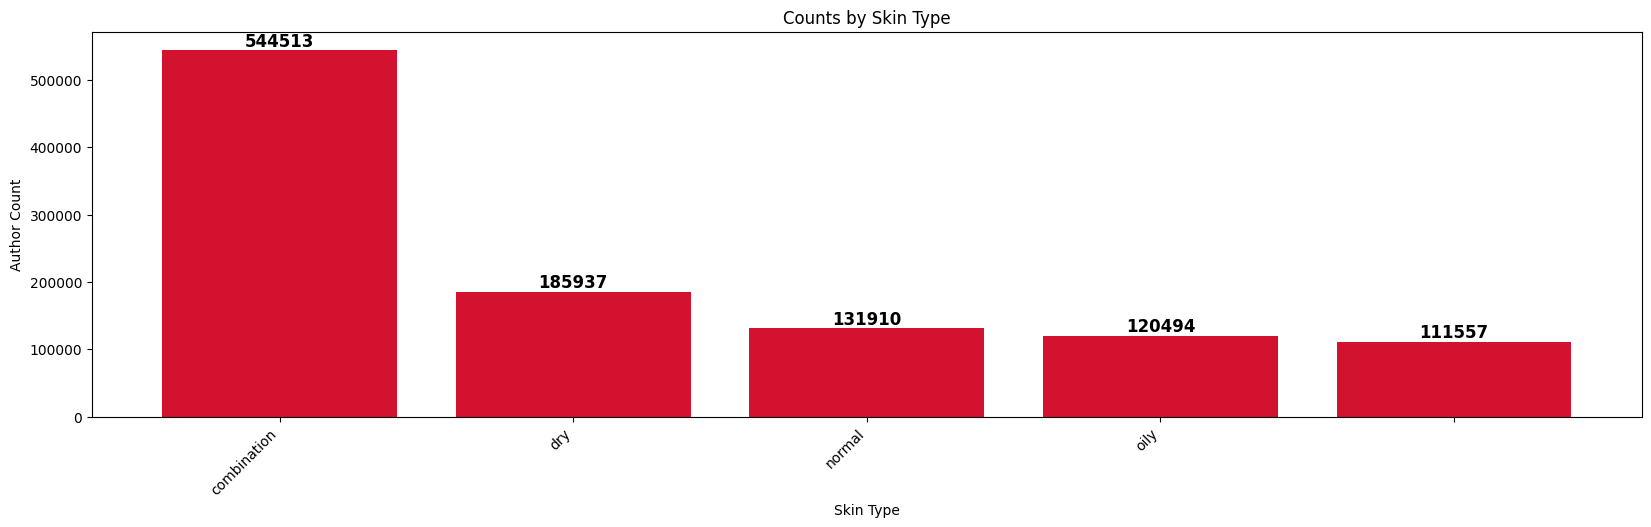

In [15]:
plt.figure(figsize=(20, 5))  # Set figure size for readability

d = reviews.groupby('skin_type')['author_id'].count().sort_values(ascending=False)  # Group, count, and sort

# Create the bar chart with error bars (optional)
plt.bar(d.index, d)  # Add error bars as 10% of count (adjust as needed)
# Annotate bar values with alignment
bars = plt.bar(d.index, d)  # Get bar objects for annotation
for bar, label in zip(bars, d):
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{label:.0f}",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')  # Adjust text formatting

plt.xlabel('Skin Type')
plt.ylabel('Author Count')
plt.title('Counts by Skin Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()


In [16]:
plt.figure(figsize=(30, 5))  # Set figure size for readability
def vis():
    c1=input("Choose a column namefrom\n(eye_color,hair_color,skin_tone,skin_type)")
    d=reviews.groupby([c1 ,'brand_name'])['author_id'].count()
    print(reviews[c1].value_counts().index)
    d1=input("Your choice")
     
    plt.bar(d[d1].index,d[d1])
    plt.xticks(rotation=65)
    plt.xlabel('Brand Name')
    plt.ylabel('Frequency')
    t="Number of reviews by {} = {}".format(c1,d1)
    plt.title(t)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

    plt.show()

vis()




# WORDCLOUD

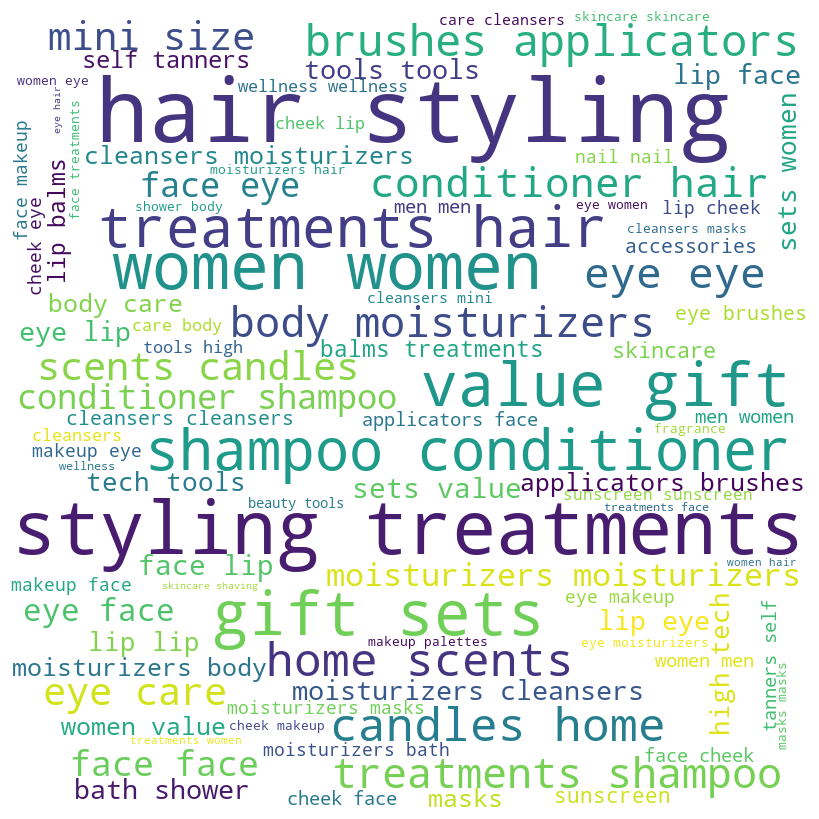

In [ ]:

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file

for val in product_info['secondary_category']:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


# Step 2 : Content Based Recommendations

In this section we will compute the pairwise similarity score of all products based on their features and recommend products accordingly.

The features are in the highlights column of our dataset.
# Logic behind Similarity Score:

# 1. Text to Vectors:

    The system converts the textual descriptions (highlights) from each product into numerical representations called word vectors. 

    This allows for mathematical calculations to compare products.

# 2. Cosine Similarity:

    The system calculates the cosine similarity between the two product vectors. Imagine the vectors as arrows in space. 

    Cosine similarity measures how closely the angles between these arrows are.
# 3. Similarity Score (0-1):

    The cosine similarity calculation results in a score ranging from 0 to 1.
    
    A score closer to 0 indicates low similarity between the products (their descriptions have very different words/concepts).
    
    A score closer to 1 indicates high similarity between the products (their descriptions share many words/concepts).

In [ ]:
products = pd.DataFrame(product_info, columns=['product_id','product_name','ingredients','highlights'])
products.head(5)
products.shape

(8494, 4)

In [ ]:
products = products.dropna(subset='highlights')
products.shape

(8494, 4)

In [ ]:
# Resetting the index of the DataFrame. The drop parameter is used to avoid the old index being added as a column when the index is reset.
products = products.reset_index(drop=True)

# Constructing a series from a dictionary with data indices and index product_name
indices = pd.Series(products.index, index=products['product_name'])


# Tfiproduct_info -> Feature Extraction
1. We found the most frequent words and their Tf(Term Frequency) and Iproduct_info(Inverse Document Frequency)
2. Then we that into a vector
3. Finally,we made a matrix out of it


It helps in reducing the number if terms and also remove the stopwords

In [ ]:
# Creating an instance of TF-Iproduct_info vectorizer Object.
vectorizer = TfidfVectorizer()

# Extracting the values from the highlights column as our corpus
texts = products.highlights.values

#print(texts)

# Creating the matrix
tfiproduct_info_matrix = vectorizer.fit_transform(texts)

# Displaying the shape of tfiproduct_info_matrix
print(tfiproduct_info_matrix.shape)

print("It means that from we have found {} sentences and {} unique and KEY words.\n\nThose keys words are :-\n{}".format(tfiproduct_info_matrix.shape[0],tfiproduct_info_matrix.shape[1],vectorizer.get_feature_names_out()))



(8494, 159)
It means that from we have found 8494 sentences and 159 unique and KEY words.

Those keys words are :-
['2017' '2018' '2019' '2020' '2021' '2022' 'acid' 'acne' 'agents' 'aging'
 'aha' 'alcohol' 'all' 'allure' 'anti' 'at' 'available' 'award'
 'bareminerals' 'beauty' 'best' 'black' 'blemishes' 'brassiness' 'care'
 'cbd' 'choice' 'circles' 'clean' 'coily' 'collagen' 'color' 'combination'
 'combo' 'community' 'coverage' 'cream' 'cruelty' 'curl' 'curling' 'curly'
 'customizable' 'damage' 'dark' 'dry' 'dryness' 'dullness' 'earthy'
 'enhancing' 'fading' 'favorite' 'finish' 'firmness' 'flaky' 'floral'
 'for' 'formaldehyde' 'formaldehydes' 'formula' 'foundation' 'fragrance'
 'free' 'fresh' 'frizz' 'full' 'genderless' 'gluten' 'glycolic' 'good'
 'hair' 'heat' 'high' 'hold' 'hyaluronic' 'hydrating' 'hypoallergenic'
 'increases' 'lactic' 'layerable' 'lengthening' 'light' 'liquid' 'long'
 'loose' 'loss' 'matte' 'medium' 'metallic' 'mineral' 'natural'
 'niacinamide' 'normal' 'of' 'oil' '

In [ ]:
vectorizer.get_feature_names_out()

array(['2017', '2018', '2019', '2020', '2021', '2022', 'acid', 'acne',
       'agents', 'aging', 'aha', 'alcohol', 'all', 'allure', 'anti', 'at',
       'available', 'award', 'bareminerals', 'beauty', 'best', 'black',
       'blemishes', 'brassiness', 'care', 'cbd', 'choice', 'circles',
       'clean', 'coily', 'collagen', 'color', 'combination', 'combo',
       'community', 'coverage', 'cream', 'cruelty', 'curl', 'curling',
       'curly', 'customizable', 'damage', 'dark', 'dry', 'dryness',
       'dullness', 'earthy', 'enhancing', 'fading', 'favorite', 'finish',
       'firmness', 'flaky', 'floral', 'for', 'formaldehyde',
       'formaldehydes', 'formula', 'foundation', 'fragrance', 'free',
       'fresh', 'frizz', 'full', 'genderless', 'gluten', 'glycolic',
       'good', 'hair', 'heat', 'high', 'hold', 'hyaluronic', 'hydrating',
       'hypoallergenic', 'increases', 'lactic', 'layerable',
       'lengthening', 'light', 'liquid', 'long', 'loose', 'loss', 'matte',
       'medium', 'm

# Computing the cosine similarity matrix

1. Make a table of word count
2. Plot the points (OPTIONAL)
3. Figure out the angles thus formed
4. Calclate the Cosine of that angle


    0 => Most UNsimilar
    
    1 => Most Similar


In [ ]:
cosine_similarity = linear_kernel(tfiproduct_info_matrix, tfiproduct_info_matrix)

print(cosine_similarity)

[[1.         0.83128126 0.83585525 ... 0.         0.         0.        ]
 [0.83128126 1.         0.74773558 ... 0.         0.         0.        ]
 [0.83585525 0.74773558 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
# Function that takes in product name as input returns most similar products
def get_recommendations(product_name,cosine_similarity):
    # Getting the index of the product that matches the name 
    """ 
        Its a series from a dictionary with INDEXES and index PRODUCT_NAME
            indices = pd.Series(products.index, index=products['product_name'])
    """

    idx = indices[product_name]

    # Getting the pairwise similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_similarity[idx]))

    # Sorting the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Getting the scores of the 10 most similar products
    sim_scores = sim_scores[1:11]

    # Getting the product indices
    product_indices = [i[0] for i in sim_scores]

    # Returning the top 10 most similar products
    a= products['product_name'].iloc[product_indices]
    required = product_info[["product_name", "brand_name", "price_usd"]] 
    new_product_info = pd.DataFrame(columns=["product_name", "brand_name", "price_usd"]) # Empty DataFrame
    for i in a:
        x = required[required["product_name"] == i]
        new_product_info=pd.concat([new_product_info, x], ignore_index=True)
    return new_product_info

# Recomendation

In [ ]:
get_recommendations("Superfood Antioxidant Cleanser",cosine_similarity)


C:\Users\nisth\AppData\Local\Temp\ipykernel_21468\3168602250.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_product_info=pd.concat([new_product_info, x], ignore_index=True)


,product_name,brand_name,price_usd
0,Equilibrium Restoring Essence,Hourglass,65.0
1,Cicapair Tiger Grass Sleepair Intensive Mask,Dr. Jart+,42.0
2,Daily Microfoliant Exfoliator Refill Pack,Dermalogica,56.0
3,PRO Blush Brush #96,SEPHORA COLLECTION,30.0
4,Balancing Cleanser,Alpha-H,38.0
5,The Deep Cleanse Gentle Exfoliating Cleanser,Tatcha,40.0
6,Mini Deep Cleanse Gentle Exfoliating Cleanser,Tatcha,18.0
7,Seville Orange Perfume Oil Rollerball,NEST New York,35.0
8,Seville Orange Perfume Oil,NEST New York,98.0
9,Take The Day Off Cleansing Balm Makeup Remover,CLINIQUE,38.0


In [ ]:
['Arancia di Capri Candle','Wild Huckleberry 8-Acid Polishing Peel Mask','Vitamin C & Bearberry Instant Glow Serum','Black Opium Gift Set'
 'Yerba Mate Resurfacing + Exfoliating Energy Facial with Enzymes + Niacinamide','Superfood Antioxidant Cleanser','Curl Foaming Gel']

['Arancia di Capri Candle',
 'Wild Huckleberry 8-Acid Polishing Peel Mask',
 'Vitamin C & Bearberry Instant Glow Serum',
 'Black Opium Gift SetYerba Mate Resurfacing + Exfoliating Energy Facial with Enzymes + Niacinamide',
 'Superfood Antioxidant Cleanser',
 'Curl Foaming Gel']

# Brand wise Categories

Top 10 Products (by loves_count):
                                     product_name  loves_count
                                   Bright Crystal       159691
Mini Bright Crystal and Bright Crystal Absolu Set        73801
                                             Eros        46412
                 Bright Crystal Ovetto Mini Spray        42528
                                     Crystal Noir        37305
                            Dylan Blue Pour Femme        36867
                                     Mini Duo Set        29361
                    Eros Pour Femme Eau de Parfum        26660
                                   Yellow Diamond        24475
                            Bright Crystal Absolu        22420


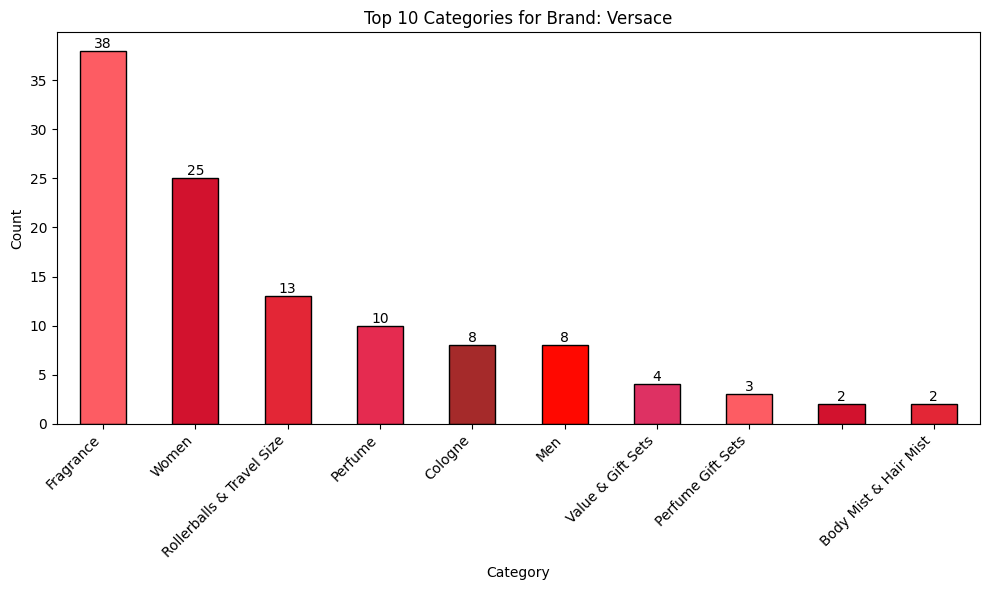

In [ ]:
brand_name=input("Enter the BRAND Name: ")
brand_data = product_info[product_info['brand_name'].str.lower()  == brand_name.lower()]

# Top 10 Products (by loves_count or alternative metric)
top_products = brand_data.nlargest(10, 'loves_count')  # Replace with other metric if needed

# Top 10 Categories (combined primary, secondary, and tertiary)
combined_categories = brand_data[['primary_category', 'secondary_category', 'tertiary_category']].dropna().stack()
category_counts = combined_categories.value_counts().nlargest(10)
print("Top 10 Products (by loves_count):")
print(top_products[['product_name', 'loves_count']].to_string(index=False))
#print("\nTop 10 Categories:")
#print(category_counts.to_string())  
#sns.set_palette(color)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax=category_counts.plot(kind='bar',color=color ,edgecolor='black')
for bar, label in zip(ax.containers[0], category_counts):
    height = bar.get_height()
    if height > 0:  # Check if bar height is positive to avoid division by zero
        plt.annotate(f"{label:.0f}", (bar.get_x() + bar.get_width() / 2, height),
                      ha='center', va='bottom')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title(f"Top 10 Categories for Brand: {brand_name}")
plt.xticks(rotation=45, ha='right')  # Rotate category labels for readability
plt.tight_layout()
plt.show()




# Review Analysis

In [ ]:
def analyze_sentiment(text):
    analyzer = vader.SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]

    if compound > 0.05:
        return "positive"
    elif compound < -0.05:
        return "negative"
    else:
        return "neutral"


def visualize_dataframe(reviews, title):
    # Distribution of Rating
    reviews["rating"].hist()
    plt.title(title)
    plt.show()

    # Word Cloud (remove stop words and consider stemming/lemmatization)
    stopwords = nltk.corpus.stopwords.words("english")
    text = " ".join(
        [word for word in reviews["review_title"] if word not in stopwords]
    )
    wordcloud = WordCloud(width=800, height=600).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{title} - Word Cloud")
    plt.show()

Index(['brown', '', 'blonde', 'black', 'auburn', 'red', 'brunette', 'gray'], dtype='object', name='hair_color')


C:\Users\nisth\AppData\Local\Temp\ipykernel_21468\3379356368.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sentiment"] = data["review_title"].apply(analyze_sentiment)


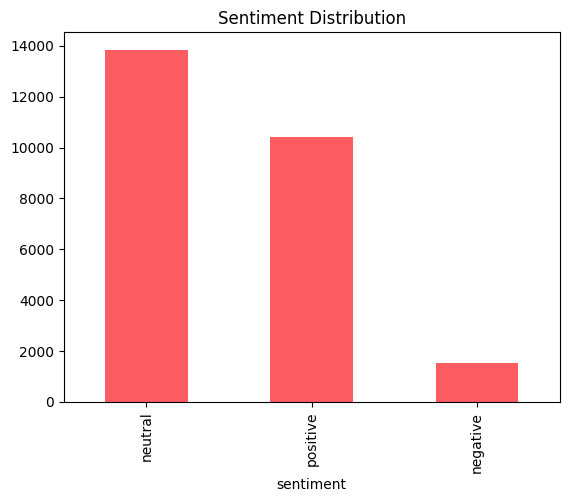

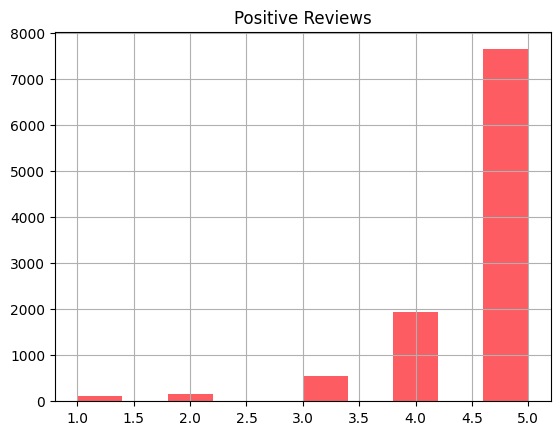

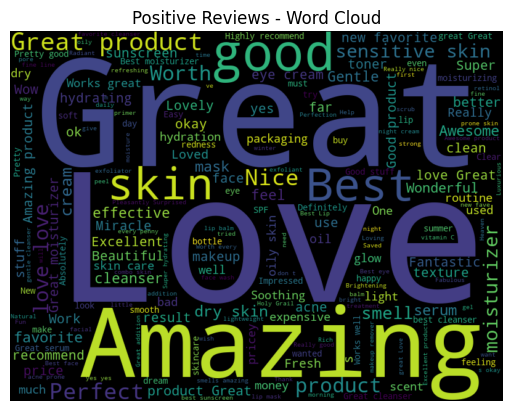

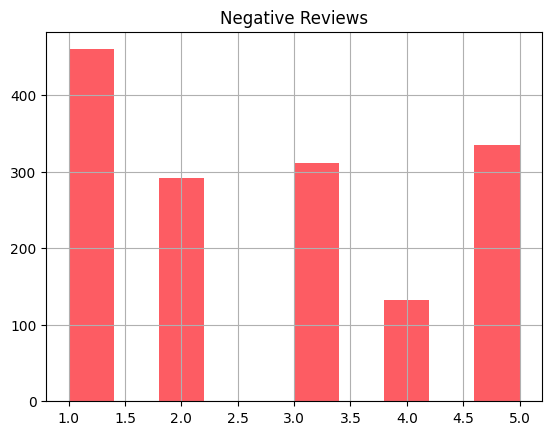

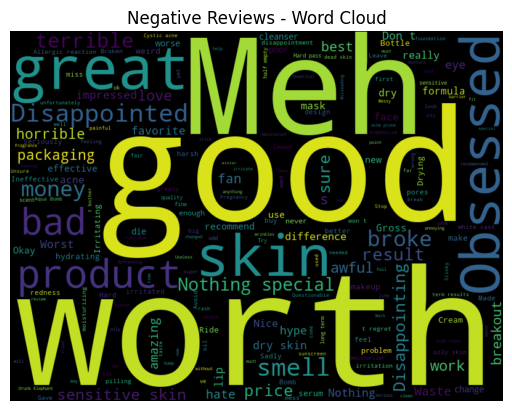

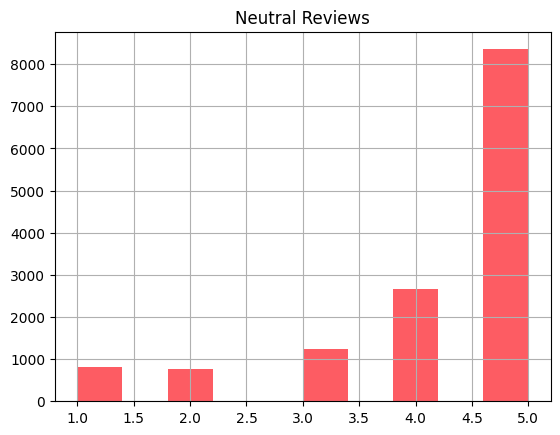

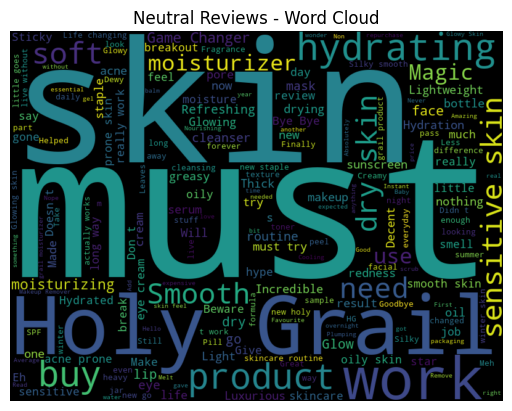

In [ ]:
def data_selection():
    c1=input("Choose a column namefrom\n(eye_color,hair_color,skin_tone,skin_type)")
    print(reviews[c1].value_counts().index)
    d1=input("Choose one: ")
    data=reviews[reviews[c1]==d1]
    return data
data=data_selection()


def analyze_sentiment(text):
    analyzer = vader.SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]

    if compound > 0.05:
        return "positive"
    elif compound < -0.05:
        return "negative"
    else:
        return "neutral"


def visualize_dataframe(reviews, title):
    # Distribution of Rating
    reviews["rating"].hist()
    plt.title(title)
    plt.show()

    # Word Cloud (remove stop words and consider stemming/lemmatization)
    stopwords = nltk.corpus.stopwords.words("english")
    text = " ".join(
        [word for word in reviews["review_title"] if word not in stopwords]
    )
    wordcloud = WordCloud(width=800, height=600).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{title} - Word Cloud")
    plt.show()

# Add a new column for sentiment
data["sentiment"] = data["review_title"].apply(analyze_sentiment)

# Visualize sentiment distribution
sentiment_counts = data["sentiment"].value_counts()
sentiment_counts.plot(kind="bar", title="Sentiment Distribution")
plt.show()

# Visualize individual DataFrames based on sentiment (optional)
positive_df = data[data["sentiment"] == "positive"]
visualize_dataframe(positive_df, "Positive Reviews")

negative_df = data[data["sentiment"] == "negative"]
visualize_dataframe(negative_df, "Negative Reviews")

neutral_df = data[data["sentiment"] == "neutral"]
visualize_dataframe(neutral_df, "Neutral Reviews")

In [ ]:
reviews['submission_time']=pd.to_datetime(reviews['submission_time'])
reviews['month']=pd.DatetimeIndex(reviews['submission_time']).month
reviews['year']=pd.DatetimeIndex(reviews['submission_time']).year


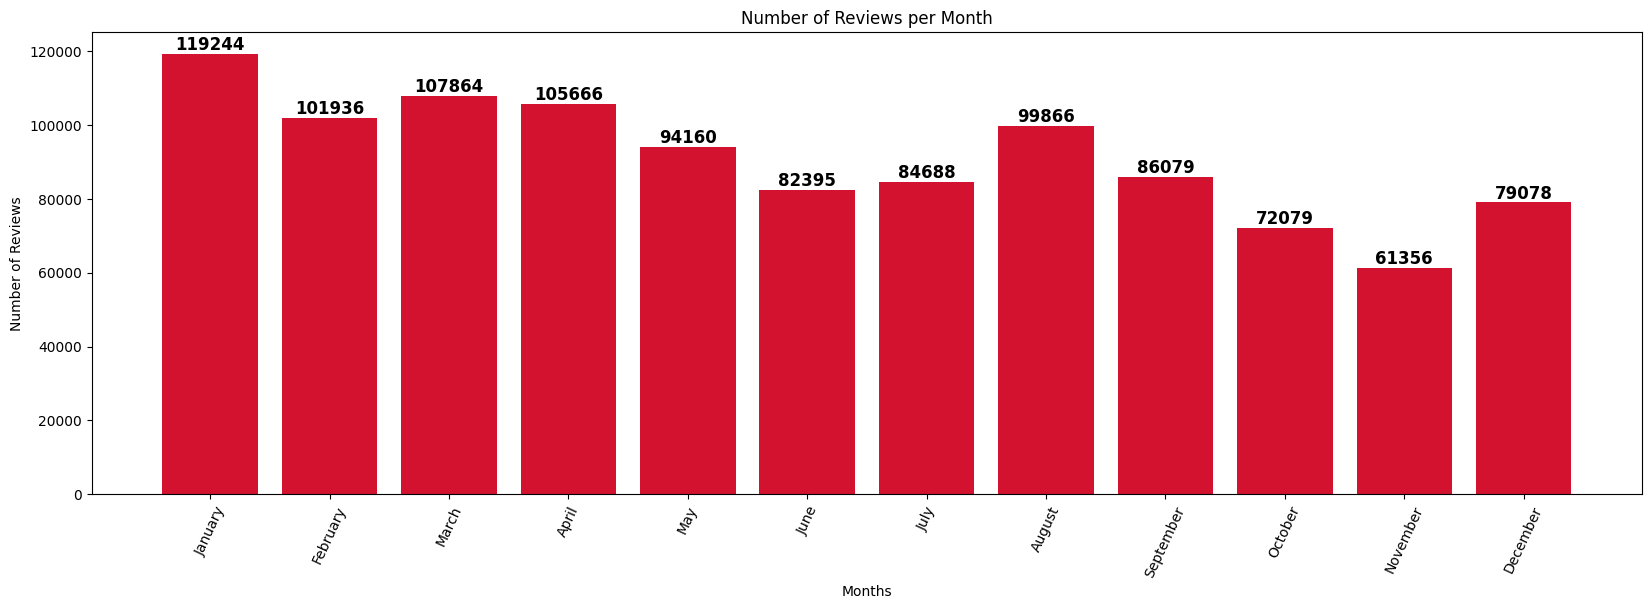

In [ ]:
plt.figure(figsize=(20,6))
a = reviews.groupby('month')['author_id'].count()
plt.bar(a.index, a)  

months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

plt.xlabel("Months")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews per Month")
bars = plt.bar(a.index, a)
for bar, label in zip(bars, a):
    height = bar.get_height()
    if height > 0:  # Only annotate bars with positive values
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{label:.0f}",
                 ha='center', va='bottom', fontsize=12, fontweight='bold')  
plt.xticks(range(1,13), months,rotation=65)  

plt.show()


Feb


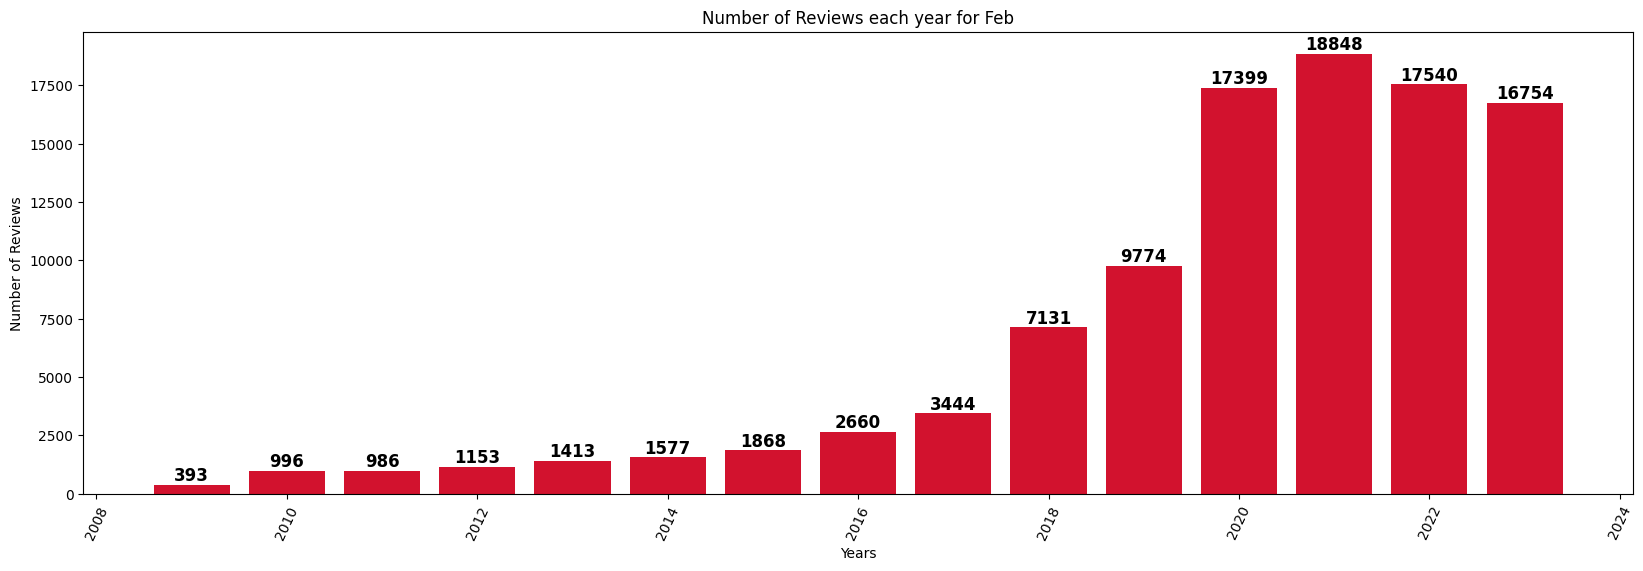

In [ ]:
mon={1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

plt.figure(figsize=(20,6))
a=reviews.groupby(['year','month'])['author_id'].count()
month=int(input("Enter the month(1-12): "))
try:
    a=a[:,month][:]
    plt.bar(a.index,a)
    print(mon[month])
    plt.xlabel("Years")
    plt.ylabel("Number of Reviews")
    plt.title("Number of Reviews each year for {}".format(mon[month]))
    bars = plt.bar(a.index, a)
    for bar, label in zip(bars, a):
        height = bar.get_height()
        if height > 0:  # Only annotate bars with positive values
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{label:.0f}",
                    ha='center', va='bottom', fontsize=12, fontweight='bold')  
    plt.xticks(rotation=65)  
    
except:
    print("Data for entered month is not available".format(month))

In [ ]:
a=reviews.groupby(['year','month'])['author_id'].count()


def vis2():
    year=int(input("Enter the year(2018-2024): "))
    month=int(input("Enter the month(1-12): "))
    try:
        b=a[year,month]
        print("{} reviews posted in the {} {}.".format(b,mon[month],year))
    except:
        print("Data for the input {} month or {} year is unavailable".format(month,year))
vis2()

17399 reviews posted in the Feb 2020.


In [ ]:
import qrcode
q=qrcode.make("https://docs.google.com/document/d/1rGkO4mwY0USdqvx1CFehrS3K9WAWMDHAEUOLCUA74Yk/edit")
q.save("qrcode.png")
